In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [137]:
def plot_model(name, model, X):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    h = .02
    X_sub = X_train[:, :2]
    model.fit(X_sub, y_train)
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Plotting the data

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


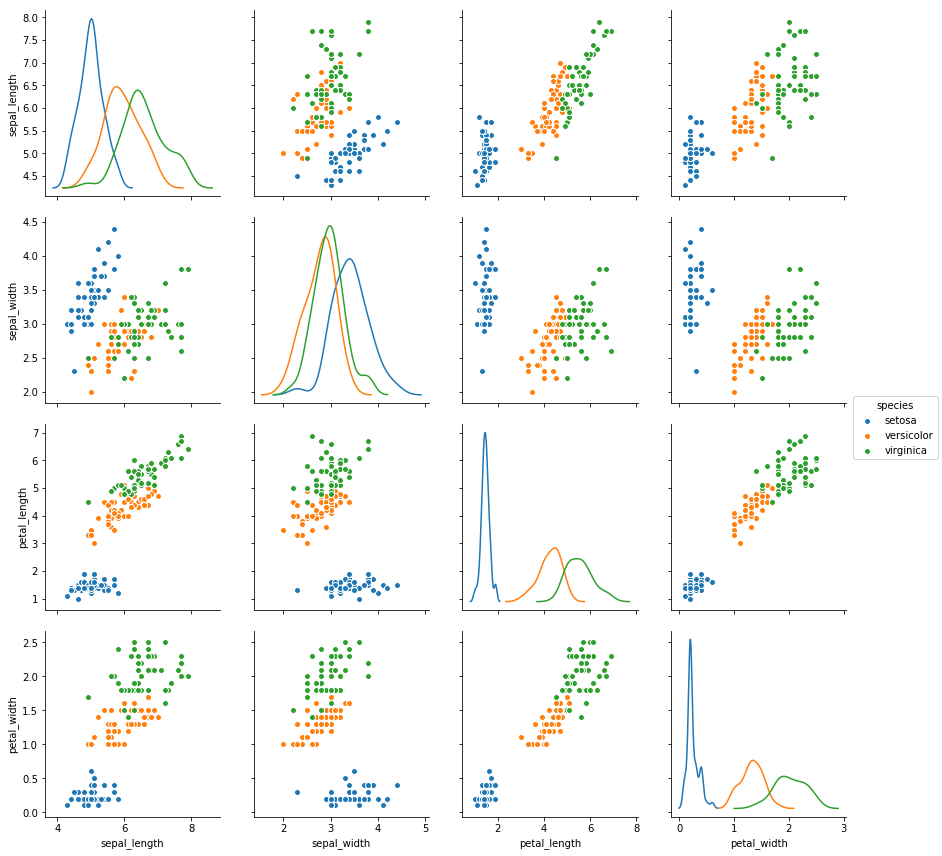

In [32]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=3, diag_kind="kde")

# Training the model

In [6]:
iris_dataset = load_iris()

Separate features and labels

In [116]:
X = iris_dataset.data
y = iris_dataset.target

X is a vector of features (sepal and petal width and length), y is a vector of labels (setosa, versicolor, virginica)

In [14]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Separate the dataset into a training and test set

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [145]:
X.shape, y.shape

((150, 4), (150,))

In [146]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [147]:
X_test.shape, y_test.shape

((60, 4), (60,))

### Logistic Regression

In [160]:
models = [('Logistic Regression', LogisticRegression())]

In [161]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test, model.predict(X_test)))

Logistic Regression
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]


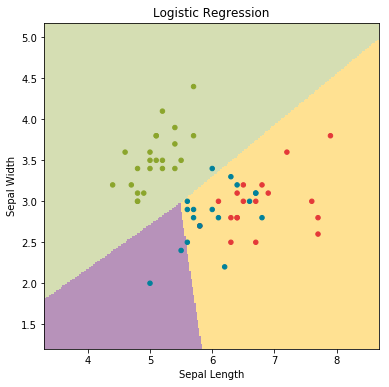

In [150]:
for name, model in models:
    plot_model(name, model, X)

### K Means Clustering

In [162]:
models = [('KMeans 8 clusters', KMeans(n_clusters=8)),
          ('KMeans 3 clusters', KMeans(n_clusters=3))]

In [163]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test, model.predict(X_test)))

KMeans 8 clusters
[[ 0 15  0  0  0  0  0  8]
 [ 0  0  0 10  1  0  8  0]
 [ 4  0  5  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
KMeans 3 clusters
[[ 0 23  0]
 [ 2  0 17]
 [16  0  2]]


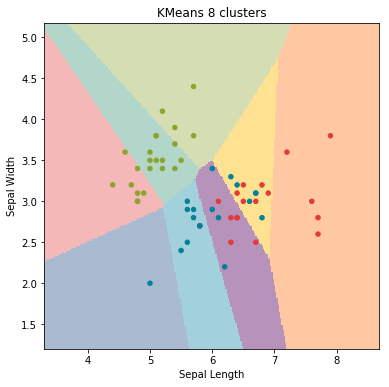

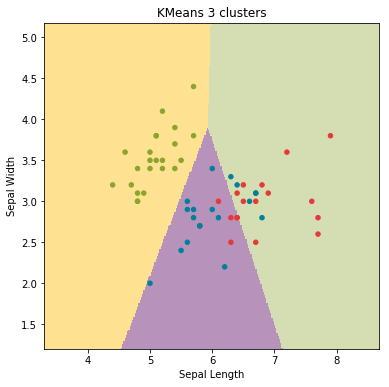

In [153]:
for name, model in models:
    plot_model(name, model, X)

### Support Vector Machines